# Pandas Essentials Part 2
## Data Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Data/worldcitiespop.csv', low_memory=False)

In [4]:
df.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,06,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,06,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,06,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,06,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,06,NaN,42.466667,1.483333


In [5]:
df.shape

(3173958, 7)

In [6]:
df.dtypes

Country        object
City           object
AccentCity     object
Region         object
Population    float64
Latitude      float64
Longitude     float64
dtype: object

## 1. Missing Values

In [6]:
df.isnull().any()

Country       False
City           True
AccentCity    False
Region         True
Population     True
Latitude      False
Longitude     False
dtype: bool

In [7]:
df.isnull().sum()

Country             0
City                6
AccentCity          0
Region              8
Population    3125978
Latitude            0
Longitude           0
dtype: int64

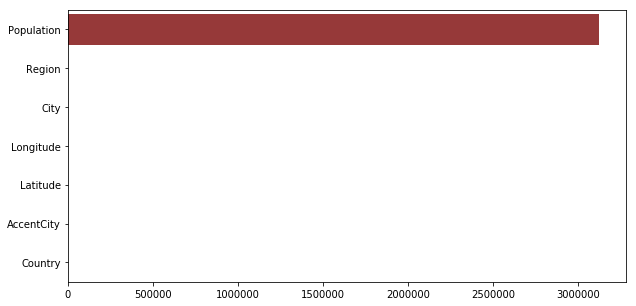

In [10]:
temp = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(temp.values, temp.index,color='Brown', orient='h')

plt.show()

### 1.1 Handling Missing Data

In [11]:
df_clean = df.dropna()
df_clean.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
6,ad,andorra la vella,Andorra la Vella,07,20430.0,42.500000,1.516667
20,ad,canillo,Canillo,02,3292.0,42.566667,1.600000
32,ad,encamp,Encamp,03,11224.0,42.533333,1.583333
49,ad,la massana,La Massana,04,7211.0,42.550000,1.516667
53,ad,les escaldes,Les Escaldes,08,15854.0,42.500000,1.533333


In [12]:
df_clean.isnull().any()

Country       False
City          False
AccentCity    False
Region        False
Population    False
Latitude      False
Longitude     False
dtype: bool

In [13]:
df.shape, df_clean.shape, (df.shape[0] - df_clean.shape[0])

((3173958, 7), (47979, 7), 3125979)

### 1.2 Filling Missing Data

In [14]:
df_filled = df.copy()
df_filled['Population'] = df_filled['Population'].fillna(df_filled['Population'].min())

In [15]:
df_filled.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,06,7.0,42.483333,1.466667
1,ad,aixirivali,Aixirivali,06,7.0,42.466667,1.500000
2,ad,aixirivall,Aixirivall,06,7.0,42.466667,1.500000
3,ad,aixirvall,Aixirvall,06,7.0,42.466667,1.500000
4,ad,aixovall,Aixovall,06,7.0,42.466667,1.483333


In [16]:
df_filled.isnull().any()

Country       False
City           True
AccentCity    False
Region         True
Population    False
Latitude      False
Longitude     False
dtype: bool

In [26]:
df_filled.isnull().sum().sort_values(ascending=False)

Region        8
City          6
Longitude     0
Latitude      0
Population    0
AccentCity    0
Country       0
dtype: int64

In [17]:
df.shape

(3173958, 7)

In [18]:
df_filled_dropped = df_filled.dropna()

In [19]:
df_filled_dropped.shape

(3173944, 7)

In [30]:
df_filled_dropped.isnull().any()

Country       False
City          False
AccentCity    False
Region        False
Population    False
Latitude      False
Longitude     False
dtype: bool

## 2. Selecting Subsets

In [20]:
df_subset = df_clean[['City', 'Population']]

In [21]:
df_subset.head(7)

,City,Population
6,andorra la vella,20430.0
20,canillo,3292.0
32,encamp,11224.0
49,la massana,7211.0
53,les escaldes,15854.0
66,ordino,2553.0
80,sant julia de loria,8020.0


In [26]:
pop_greater_10m = df_clean[df_clean['Population']> 10000000]
pop_greater_10m

,Country,City,AccentCity,Region,Population,Latitude,Longitude
316800,br,sao paulo,São Paulo,27,10021437.0,-23.473293,-46.665803
570824,cn,shanghai,Shanghai,23,14608512.0,31.045556,121.399722
1327914,in,bombay,Bombay,16,12692717.0,18.975000,72.825833
1331162,in,delhi,Delhi,07,10928270.0,28.666667,77.216667
1349146,in,new delhi,New Delhi,07,10928270.0,28.600000,77.200000
1544449,jp,tokyo,Tokyo,40,31480498.0,35.685000,139.751389
1626528,kr,seoul,Seoul,11,10323448.0,37.598500,126.978300
2130459,ph,manila,Manila,D9,10443877.0,14.604200,120.982200
2200161,pk,karachi,Karachi,05,11627378.0,24.905600,67.082200
2461968,ru,moscow,Moscow,48,10381288.0,55.752222,37.615556


## 3. Slicing



In [30]:
pop_10m_sorted = pop_greater_10m.sort_values(by='Population', ascending=False)

In [32]:
pop_10m_sorted[:3]

,Country,City,AccentCity,Region,Population,Latitude,Longitude
1544449,jp,tokyo,Tokyo,40,31480498.0,35.685000,139.751389
570824,cn,shanghai,Shanghai,23,14608512.0,31.045556,121.399722
1327914,in,bombay,Bombay,16,12692717.0,18.975000,72.825833


In [64]:
pop_greater_10m[::2]

,Country,City,AccentCity,Region,Population,Latitude,Longitude
316800,br,sao paulo,São Paulo,27,10021437.0,-23.473293,-46.665803
1327914,in,bombay,Bombay,16,12692717.0,18.975000,72.825833
1349146,in,new delhi,New Delhi,07,10928270.0,28.600000,77.200000
1626528,kr,seoul,Seoul,11,10323448.0,37.598500,126.978300
2200161,pk,karachi,Karachi,05,11627378.0,24.905600,67.082200


In [65]:
pop_greater_10m[::-2]

,Country,City,AccentCity,Region,Population,Latitude,Longitude
2461968,ru,moscow,Moscow,48,10381288.0,55.752222,37.615556
2130459,ph,manila,Manila,D9,10443877.0,14.604200,120.982200
1544449,jp,tokyo,Tokyo,40,31480498.0,35.685000,139.751389
1331162,in,delhi,Delhi,07,10928270.0,28.666667,77.216667
570824,cn,shanghai,Shanghai,23,14608512.0,31.045556,121.399722


## 4. Delete Columns

In [67]:
pop_greater_10m.drop(['Latitude', 'Longitude'], axis=1).head(2)

,Country,City,AccentCity,Region,Population
316800,br,sao paulo,São Paulo,27,10021437.0
570824,cn,shanghai,Shanghai,23,14608512.0


In [68]:
del pop_greater_10m['AccentCity']
pop_greater_10m.head(2)


,Country,City,Region,Population,Latitude,Longitude
316800,br,sao paulo,27,10021437.0,-23.473293,-46.665803
570824,cn,shanghai,23,14608512.0,31.045556,121.399722


In [33]:
pop_greater_10m

,Country,City,AccentCity,Region,Population,Latitude,Longitude
316800,br,sao paulo,São Paulo,27,10021437.0,-23.473293,-46.665803
570824,cn,shanghai,Shanghai,23,14608512.0,31.045556,121.399722
1327914,in,bombay,Bombay,16,12692717.0,18.975000,72.825833
1331162,in,delhi,Delhi,07,10928270.0,28.666667,77.216667
1349146,in,new delhi,New Delhi,07,10928270.0,28.600000,77.200000
1544449,jp,tokyo,Tokyo,40,31480498.0,35.685000,139.751389
1626528,kr,seoul,Seoul,11,10323448.0,37.598500,126.978300
2130459,ph,manila,Manila,D9,10443877.0,14.604200,120.982200
2200161,pk,karachi,Karachi,05,11627378.0,24.905600,67.082200
2461968,ru,moscow,Moscow,48,10381288.0,55.752222,37.615556


In [48]:
pop_greater_10m.drop(pop_greater_10m.index[3:8])

,Country,City,AccentCity,Region,Population,Latitude,Longitude
316800,br,sao paulo,São Paulo,27,10021437.0,-23.473293,-46.665803
570824,cn,shanghai,Shanghai,23,14608512.0,31.045556,121.399722
1327914,in,bombay,Bombay,16,12692717.0,18.975000,72.825833
2200161,pk,karachi,Karachi,05,11627378.0,24.905600,67.082200
2461968,ru,moscow,Moscow,48,10381288.0,55.752222,37.615556


## 5. Inserting Columns

In [54]:
countries = ['Brazil', 'China', 'India', 'India', 'India', 'Japan', 'South Korea', 'Philippines', 'Pakistan', 'Rusia']
pop_greater_10m.loc[:, 'CountryName'] = countries

C:\Users\Shakur\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [58]:
pop_greater_10m

,Country,City,Region,Population,Latitude,Longitude,CountryName
316800,br,sao paulo,27,10021437.0,-23.473293,-46.665803,Brazil
570824,cn,shanghai,23,14608512.0,31.045556,121.399722,China
1327914,in,bombay,16,12692717.0,18.975000,72.825833,India
1331162,in,delhi,07,10928270.0,28.666667,77.216667,India
1349146,in,new delhi,07,10928270.0,28.600000,77.200000,India
1544449,jp,tokyo,40,31480498.0,35.685000,139.751389,Japan
1626528,kr,seoul,11,10323448.0,37.598500,126.978300,South Korea
2130459,ph,manila,D9,10443877.0,14.604200,120.982200,Philippines
2200161,pk,karachi,05,11627378.0,24.905600,67.082200,Pakistan
2461968,ru,moscow,48,10381288.0,55.752222,37.615556,Rusia
